In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
path = Path('artists')

In [9]:
path.mkdir(exist_ok=True)

In [7]:
artist_names = 'kandinsky','monet','picasso'

In [9]:
for o in artist_names:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} painting', max_n=150)
    download_images(dest, urls=results)

In [16]:
fns = get_image_files(path)
fns

(#439) [Path('artists/kandinsky/00000000.jpg'),Path('artists/kandinsky/00000003.jpg'),Path('artists/kandinsky/00000004.jpg'),Path('artists/kandinsky/00000005.jpg'),Path('artists/kandinsky/00000006.jpg'),Path('artists/kandinsky/00000007.jpg'),Path('artists/kandinsky/00000009.jpg'),Path('artists/kandinsky/00000010.jpg'),Path('artists/kandinsky/00000011.jpg'),Path('artists/kandinsky/00000012.jpg')...]

In [17]:
failed = verify_images(fns)
failed

(#0) []

In [18]:
failed.map(Path.unlink)

(#0) []

In [79]:
artists = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5))

In [80]:
dls = artists.dataloaders(path)

In [82]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.976663,2.020063,0.580645,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.714122,0.528349,0.241935,00:07
1,0.526716,0.192023,0.064516,00:07
2,0.384584,0.154711,0.048387,00:07
3,0.314884,0.148902,0.048387,00:07


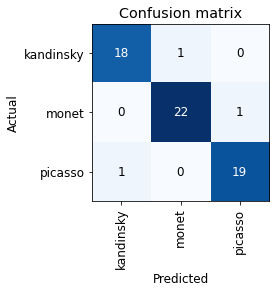

In [83]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [84]:
cleaner = ImageClassifierCleaner(learn, max_n=50)
cleaner

In [78]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [85]:
learn.export()